## Lesson-01 Assignment

## 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: 迪卡侬亚马逊的自助结账、各品牌智能音箱、火车站的刷脸进站等

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: 我们使用GitHub来同步代码和资料；Jupyter有利于保存代码执行过程中产生的各种状态，Pycharm是一个python的集成开发工具，方便大家对代码的编写和维护。

#### 2. What's the Probability Model?

Ans:指以概率论为基础，采用数学统计方法建立的模型，有些过程无法用理论分析方法导出其模型，但可通过试验测定数据，经过数理统计法求得各变量之间的函数关系。

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:做线性回归、聚类、分类、判别分析等

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:使用概率可以方便的判断出一个句子是否合理，我感觉困难点在于数据的预处理。

#### 5. What's the Language Model;

Ans:可以理解为一个字符串的概率分布模型，对字符串中的每一个字符给出对应的概率。

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:汉语分词、句法分析等等

#### 7. What's the 1-gram language model;

Ans:一元语法模型即模型中的每个词都独立于其它词。

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:优点是生成简单，容易理解；缺点是没有考虑单词与单词之间的相互关系，不适合用来推断句子的合理性。

#### 9. What't the 2-gram models;

Ans:二元语法模型表示出现在某个位置的词只与它前面的一个词有关。

## 编程实践部分

1、引入相关模块

In [47]:
%matplotlib inline
import random
import pandas as pd
import re
from collections import Counter
import jieba
from functools import reduce
from operator import add, mul
import matplotlib.pyplot as plt
import numpy as np

2、定义语法

In [54]:
# 这个语法会生成一些不太合理的句子，用来准备接下来的判断
customer = '''
customer = 人称 时间 动作 形容 物品
人称 = 我 | 他们 | 我们
时间 = 今天 | 明天
动作 = 看看 | 买点 | 试试
形容 = 好看的 | 好喝的 | 宽松的
物品 = 饮料 | 鞋子 | 衣服
'''


guide = '''
guide = 招呼 报数 询问 商品 结尾 
报数 = 我是导购 ,
招呼 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
商品 = 购买 具体业务
购买 = 买点 | 喝点
具体业务 = 啤酒 | 穿的 | 吃的 | 什么
结尾 = 吗？
'''


3、定义生成句子的方法

In [55]:
def create_grammer(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

def generate(gram, target):
    if target not in gram: return target
    expaned = [generate(gram, t) for t in random.choice(gram[target])]
    return ''.join([e for e in expaned if e != 'null'])

customer_grammer = create_grammer(customer, split='=')
sen1 = generate(gram=customer_grammer, target='customer')

guide_grammer = create_grammer(guide, split='=')
sen2 = generate(gram=guide_grammer, target='guide')
print(sen1)
print(sen2)

我们明天试试宽松的饮料
女士,您好我是导购,请问你要喝点穿的吗？


4、导入豆瓣评论数据，进行分词，生成语法模型

/Users/zhangqingxuan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


评论数据长度： 261497
文本处理进度： 0
文本处理进度： 10000
文本处理进度： 20000
文本处理进度： 30000
文本处理进度： 40000
文本处理进度： 50000
文本处理进度： 60000
文本处理进度： 70000
文本处理进度： 80000
文本处理进度： 90000
文本处理进度： 100000


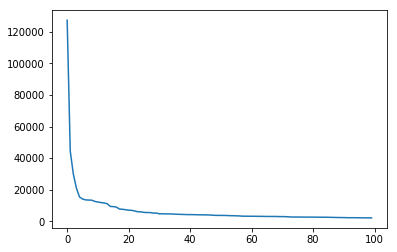

In [57]:
# 豆瓣评论数据集(在复现代码时，已经将数据集换为豆瓣评论的数据)
filename = 'movie_comments.csv'
content = pd.read_csv(filename, encoding='utf-8')
content.head(2)

comments = content['comment'].tolist()
print('评论数据长度：', len(comments))

def token(string):
    return re.findall('\w+', string)

comments_clean = [''.join(token(str(a))) for a in comments]

with open('comment_261k.txt', 'w') as f:
    for a in comments_clean:
        f.write(a + '\n')
        
def cut(string):
    return list(jieba.cut(string))

TOKEN = []
for i, line in enumerate(open('comment_261k.txt')):
    if i % 10000 == 0: print('文本处理进度：', i)
    if i > 100000: break
    TOKEN += cut(line.strip('\n'))
    
words_count = Counter(TOKEN)

frequiences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(100)]
plt.plot(x, frequiences)
# plt.plot(x, np.log(frequiences))

def prob_1(word):
    return words_count[word] / len(TOKEN)

TOKEN = [str(s) for s in TOKEN]

TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

words_count_2 = Counter(TOKEN_2_GRAM)

def prob_2(word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1 + word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)
    
def get_probablity(sentence):
    words = cut(sentence)
    sentence_prob = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_prob *= probability
    return sentence_prob


5、生成句子，调用模型判断句字的合理程度，并找出最优的句子

In [58]:
def generate_best(): # you code here
    sentences = []
    for sen in generate_n(10):
        sentences.append([sen, get_probablity(sen)])
        #print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))
    return sentences
sorted(generate_best(), key=lambda x: x[1], reverse=True)[0]

['我今天看看好看的衣服', 1.2917995960233522e-26]

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:可能使用的数据集和生成的句子本身的内容相关性不大，感觉判断的不如老师例子里那几个对比的句子那么明显。我觉得可以找一个相关性强一点的数据集重新生成模型进行判断效果可能会好一些。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)